# 12. óra
Adatelemzési platformok, BME, 2018. Március 28., 6. gyakorlati óra

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Jupiter notebook config: az ábra itt jelenjen a notebook-ban

In [6]:
%matplotlib inline

In [16]:
df = pd.read_csv("../data/caravan_withname.txt", sep="\t")

Kamányoptimalizáció: ügyfélhívások, ahol lakókocsi-biztosítást akarnak eladni.

Kérdés: lehet-e olyan modelt építeni, amivel előjelezhetjük, hogy kit érdemes felhívni.

Hozzállás
1. Minél előbb hozzunk össze egy modelt
2. Jól definiáljuk a problémát

# Főbb műveletek

* Sorok kiválasztása
    * Split
    * Filter
* Oszlopok
    * Select
    * Új oszlop készítése
* Sorok és oszlopok
    * splice: egyszerre kiválasztása
* Concat
* Aggregálás
    * Groupby
    * Pivot
* Join

In [17]:
df

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
5          23         1        2         1         5       0       5       0   
6          39         2        3         2         9       2       2       0   
7          33         1        2         3         8       0       7       0   
8          33         1        2         4         8       0       1       3   
9          11         2        3         3         3       3       5       0   
10         10         1        4         3         3       1       4       1   
11          9         1        3         3         3       1       3       2   
12         33         1        2         3         8       1       4       1   
13         41         1        3         3        10       0       5       0   
14         23         1        1         2         5       0       6       1   
15         33         1        2         3         8       0       7       0   
16         38         1        2         3         9       0       6       0   
17         22         2        3         3         5       0       5       0   
18         13         1        4         2         3       2       4       0   
19         31         1        2         4         7       0       2       0   
20         33         1        4         3         8       0       6       0   
21         33         2        3         3         8       0       4       2   
22         13         1        3         2         3       1       7       0   
23         34         2        3         2         8       0       7       0   
24         13         2        4         3         3       0       4       2   
25         33         1        3         3         8       0       6       1   
26         37         1        3         3         8       0       5       0   
27         40         1        3         3        10       0       3       0   
28         31         1        4         2         7       0       9       0   
29         33         2        2         3         8       0       7       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5792       13         1        3         3         3       1       5       1   
5793       30         1        3         3         7       0       4       1   
5794       33         1        3         2         8       0       2       4   
5795       22         1        2         2         5       0       3       1   
5796       39         1        4         2         9       0       5       1   
5797        8         1        4         3         2       0       6       1   
5798       27         1        1         6         6       1       5       2   
5799        9         1        3         3         3       0       5       0   
5800       31         1        3         3         7       2       3       0   
5801        3         1        2         4         1       0       6       1   
5802        3         1        2         4         1       1       4       1   
5803       36         1        3         3         8       0       6       0   
5804       23         1        2         2         5       2       4       1   
5805       33         1        3         3         8       0       6       1   
5806       38         2        3         2         9       0       6       1   
5807       38         2        3         4         9       0       9       0   
5808       31         1        3         2         7       2       2       0   
5809       35         1        2         3         8       0       7       0   
5810  

In [18]:
len(df)

5822

Elválasztjuk az első 3000 sort

In [19]:
df.iloc[1:5, 2:3]

MGEMOMV
1        2
2        2
3        3
4        4

In [20]:
df.iloc[:5, :3]

MOSTYPE  MAANTHUI  MGEMOMV
0       33         1        3
1       37         1        2
2       37         1        2
3        9         1        3
4       40         1        4

In [21]:
df

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
5          23         1        2         1         5       0       5       0   
6          39         2        3         2         9       2       2       0   
7          33         1        2         3         8       0       7       0   
8          33         1        2         4         8       0       1       3   
9          11         2        3         3         3       3       5       0   
10         10         1        4         3         3       1       4       1   
11          9         1        3         3         3       1       3       2   
12         33         1        2         3         8       1       4       1   
13         41         1        3         3        10       0       5       0   
14         23         1        1         2         5       0       6       1   
15         33         1        2         3         8       0       7       0   
16         38         1        2         3         9       0       6       0   
17         22         2        3         3         5       0       5       0   
18         13         1        4         2         3       2       4       0   
19         31         1        2         4         7       0       2       0   
20         33         1        4         3         8       0       6       0   
21         33         2        3         3         8       0       4       2   
22         13         1        3         2         3       1       7       0   
23         34         2        3         2         8       0       7       0   
24         13         2        4         3         3       0       4       2   
25         33         1        3         3         8       0       6       1   
26         37         1        3         3         8       0       5       0   
27         40         1        3         3        10       0       3       0   
28         31         1        4         2         7       0       9       0   
29         33         2        2         3         8       0       7       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5792       13         1        3         3         3       1       5       1   
5793       30         1        3         3         7       0       4       1   
5794       33         1        3         2         8       0       2       4   
5795       22         1        2         2         5       0       3       1   
5796       39         1        4         2         9       0       5       1   
5797        8         1        4         3         2       0       6       1   
5798       27         1        1         6         6       1       5       2   
5799        9         1        3         3         3       0       5       0   
5800       31         1        3         3         7       2       3       0   
5801        3         1        2         4         1       0       6       1   
5802        3         1        2         4         1       1       4       1   
5803       36         1        3         3         8       0       6       0   
5804       23         1        2         2         5       2       4       1   
5805       33         1        3         3         8       0       6       1   
5806       38         2        3         2         9       0       6       1   
5807       38         2        3         4         9       0       9       0   
5808       31         1        3         2         7       2       2       0   
5809       35         1        2         3         8       0       7       0   
5810  

Copy parancs egy külön helyre másolja ki.

In [36]:
train_df = df.iloc[:3000,:].copy()
test_df = df.iloc[3000:,:].copy()

In [29]:
len(train_df)

3000

In [30]:
train_df

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
5          23         1        2         1         5       0       5       0   
6          39         2        3         2         9       2       2       0   
7          33         1        2         3         8       0       7       0   
8          33         1        2         4         8       0       1       3   
9          11         2        3         3         3       3       5       0   
10         10         1        4         3         3       1       4       1   
11          9         1        3         3         3       1       3       2   
12         33         1        2         3         8       1       4       1   
13         41         1        3         3        10       0       5       0   
14         23         1        1         2         5       0       6       1   
15         33         1        2         3         8       0       7       0   
16         38         1        2         3         9       0       6       0   
17         22         2        3         3         5       0       5       0   
18         13         1        4         2         3       2       4       0   
19         31         1        2         4         7       0       2       0   
20         33         1        4         3         8       0       6       0   
21         33         2        3         3         8       0       4       2   
22         13         1        3         2         3       1       7       0   
23         34         2        3         2         8       0       7       0   
24         13         2        4         3         3       0       4       2   
25         33         1        3         3         8       0       6       1   
26         37         1        3         3         8       0       5       0   
27         40         1        3         3        10       0       3       0   
28         31         1        4         2         7       0       9       0   
29         33         2        2         3         8       0       7       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
2970        8         1        2         4         2       0       4       0   
2971        5         1        3         3         1       1       4       2   
2972       24         1        2         2         5       0       4       0   
2973       39         1        3         3         9       0       5       1   
2974       31         1        2         4         7       0       4       1   
2975       23         1        2         2         5       3       4       2   
2976        9         1        3         2         3       0       4       2   
2977       33         1        2         3         8       0       7       0   
2978       12         2        4         2         3       2       4       2   
2979       30         1        2         3         7       0       5       1   
2980        3         1        1         2         1       0       5       0   
2981       33         1        2         4         8       0       5       2   
2982       13         1        3         4         3       0       2       4   
2983        3         1        2         4         1       0       8       0   
2984       11         1        3         3         3       1       5       0   
2985       40         1        3         2        10       0       6       0   
2986        1         1        3         3         1       3       5       0   
2987       38         1        2         3         9       1       5       1   
2988  

### Ha kihagyjuk a ()-et, akkor mint egy függvényt menti el.

In [35]:
# df.iloc[:3000,:].copy

In [37]:
celvaltozo = 'CARAVAN'

In [39]:
# df[celvaltozo]

In [40]:
df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [41]:
len(df.columns)

86

In [45]:
bemeno_valtozok = ['MOSTYPE', 'MAANTHUI']

In [47]:
df[bemeno_valtozok]

MOSTYPE  MAANTHUI
0          33         1
1          37         1
2          37         1
3           9         1
4          40         1
5          23         1
6          39         2
7          33         1
8          33         1
9          11         2
10         10         1
11          9         1
12         33         1
13         41         1
14         23         1
15         33         1
16         38         1
17         22         2
18         13         1
19         31         1
20         33         1
21         33         2
22         13         1
23         34         2
24         13         2
25         33         1
26         37         1
27         40         1
28         31         1
29         33         2
...       ...       ...
5792       13         1
5793       30         1
5794       33         1
5795       22         1
5796       39         1
5797        8         1
5798       27         1
5799        9         1
5800       31         1
5801        3         1
5802        3         1
5803       36         1
5804       23         1
5805       33         1
5806       38         2
5807       38         2
5808       31         1
5809       35         1
5810       33         1
5811       39         1
5812       40         1
5813        3         1
5814        1         1
5815       13         1
5816        3         1
5817       36         1
5818       35         1
5819       33         1
5820       34         1
5821       33         1

[5822 rows x 2 columns]

In [50]:
df[bemeno_valtozok].head()

MOSTYPE  MAANTHUI
0       33         1
1       37         1
2       37         1
3        9         1
4       40         1

In [51]:
df[bemeno_valtozok].tail()

MOSTYPE  MAANTHUI
5817       36         1
5818       35         1
5819       33         1
5820       34         1
5821       33         1

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

A különböző modellek viszonylag könnyen behelyettesíthetjük egymással.

In [55]:
model.fit(train_df[bemeno_valtozok], train_df[celvaltozo])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
model.coef_

array([[-0.023945  , -0.23264738]])

In [58]:
model.intercept_

array([-1.97584718])

Predictet ritkán használjuk

In [61]:
tippek = model.predict(test_df[bemeno_valtozok])

In [64]:
np.mean(tippek)

0.0

Predict helyett:

In [66]:
model.predict_proba(test_df[bemeno_valtozok])

array([[0.95141958, 0.04858042],
       [0.95030079, 0.04969921],
       [0.95764556, 0.04235444],
       ...,
       [0.95251444, 0.04748556],
       [0.95358583, 0.04641417],
       [0.95251444, 0.04748556]])

Megmondja az egyes értékekre, hogy mi a valószinűsége

In [67]:
test_df['p0'] = 0
test_df['p1'] = 0

In [71]:
test_df[['p0','p1']].head()

p0  p1
3000   0   0
3001   0   0
3002   0   0
3003   0   0
3004   0   0

In [72]:
test_df[['p0','p1']] = model.predict_proba(test_df[bemeno_valtozok])

In [73]:
test_df[['p0','p1']].head()

p0        p1
3000  0.951420  0.048580
3001  0.950301  0.049699
3002  0.957646  0.042354
3003  0.952514  0.047486
3004  0.956664  0.043336

In [76]:
def mennyit_termel(x):
    if x == 1:
        return 1000
    else:
        return -100

In [79]:
df['CARAVAN'].head()

0    0
1    0
2    0
3    0
4    0
Name: CARAVAN, dtype: int64

In [78]:
df['CARAVAN'].mean()

0.05977327378907592

In [81]:
test_df['Profit_adott_emberen'] = test_df['CARAVAN'].apply(mennyit_termel)

In [82]:
test_df.head()

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
3000       32         1        2         3         7       0       2       2   
3001       31         1        2         4         7       0       2       2   
3002       38         1        4         2         9       2       4       2   
3003       33         1        3         3         8       0       1       3   
3004       37         1        3         2         8       1       3       3   

      MGODGE  MRELGE          ...           ABRAND  AZEILPL  APLEZIER  AFIETS  \
3000       5       5          ...                0        0         0       0   
3001       5       7          ...                1        0         0       0   
3002       4       7          ...                0        0         0       0   
3003       5       7          ...                0        0         0       0   
3004       3       5          ...                2        0         0       0   

      AINBOED  ABYSTAND  CARAVAN        p0        p1  Profit_adott_emberen  
3000        0         0        0  0.951420  0.048580                  -100  
3001        0         0        0  0.950301  0.049699                  -100  
3002        0         0        0  0.957646  0.042354                  -100  
3003        0         0        0  0.952514  0.047486                  -100  
3004        0         0        0  0.956664  0.043336                  -100  

[5 rows x 89 columns]

In [102]:
sort_test_df = test_df.sort_values("p1", ascending=False)

In [103]:
sort_test_df.head(10)

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
4870        1         1        3         3         1       1       6       0   
3736        1         1        2         4         1       0       2       0   
5018        1         1        2         4         1       4       5       1   
5220        1         1        3         2         1       2       5       0   
5216        1         1        3         3         1       3       5       0   
3230        1         1        3         3         1       3       5       0   
3993        1         1        3         2         1       2       5       0   
4371        1         1        2         4         1       0       5       2   
3917        1         1        3         3         1       0       7       0   
4376        1         1        2         4         1       4       5       1   

      MGODGE  MRELGE          ...           ABRAND  AZEILPL  APLEZIER  AFIETS  \
4870       3       9          ...                0        0         0       1   
3736       7       6          ...                1        0         0       0   
5018       0       9          ...                1        0         0       0   
5220       3       9          ...                0        0         0       0   
5216       2       9          ...                1        0         0       0   
3230       2       9          ...                0        0         0       0   
3993       3       9          ...                0        0         0       0   
4371       2       9          ...                1        0         0       0   
3917       2       7          ...                2        0         0       0   
4376       0       9          ...                0        0         0       0   

      AINBOED  ABYSTAND  CARAVAN        p0        p1  Profit_adott_emberen  
4870        0         0        0  0.903125  0.096875                  -100  
3736        0         0        0  0.903125  0.096875                  -100  
5018        0         0        0  0.903125  0.096875                  -100  
5220        0         0        0  0.903125  0.096875                  -100  
5216        0         0        1  0.903125  0.096875                  1000  
3230        0         0        0  0.903125  0.096875                  -100  
3993        0         0        0  0.903125  0.096875                  -100  
4371        0         0        0  0.903125  0.096875                  -100  
3917        0         0        1  0.903125  0.096875                  1000  
4376        0         0        0  0.903125  0.096875                  -100  

[10 rows x 89 columns]

In [104]:
sort_test_df['CumProfit'] = sort_test_df["Profit_adott_emberen"].cumsum()

In [105]:
sort_test_df.head(10)

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
4870        1         1        3         3         1       1       6       0   
3736        1         1        2         4         1       0       2       0   
5018        1         1        2         4         1       4       5       1   
5220        1         1        3         2         1       2       5       0   
5216        1         1        3         3         1       3       5       0   
3230        1         1        3         3         1       3       5       0   
3993        1         1        3         2         1       2       5       0   
4371        1         1        2         4         1       0       5       2   
3917        1         1        3         3         1       0       7       0   
4376        1         1        2         4         1       4       5       1   

      MGODGE  MRELGE    ...      AZEILPL  APLEZIER  AFIETS  AINBOED  ABYSTAND  \
4870       3       9    ...            0         0       1        0         0   
3736       7       6    ...            0         0       0        0         0   
5018       0       9    ...            0         0       0        0         0   
5220       3       9    ...            0         0       0        0         0   
5216       2       9    ...            0         0       0        0         0   
3230       2       9    ...            0         0       0        0         0   
3993       3       9    ...            0         0       0        0         0   
4371       2       9    ...            0         0       0        0         0   
3917       2       7    ...            0         0       0        0         0   
4376       0       9    ...            0         0       0        0         0   

      CARAVAN        p0        p1  Profit_adott_emberen  CumProfit  
4870        0  0.903125  0.096875                  -100       -100  
3736        0  0.903125  0.096875                  -100       -200  
5018        0  0.903125  0.096875                  -100       -300  
5220        0  0.903125  0.096875                  -100       -400  
5216        1  0.903125  0.096875                  1000        600  
3230        0  0.903125  0.096875                  -100        500  
3993        0  0.903125  0.096875                  -100        400  
4371        0  0.903125  0.096875                  -100        300  
3917        1  0.903125  0.096875                  1000       1300  
4376        0  0.903125  0.096875                  -100       1200  

[10 rows x 90 columns]

In [106]:
sort_test_df = sort_test_df.reset_index()

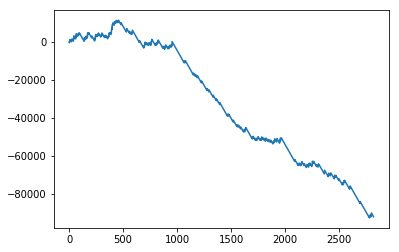

In [107]:
plt.plot(sort_test_df['CumProfit'])

In [108]:
sort_test_df['CumProfit'].max()

11400